### Episode 04: Customer Churn Prediction with Machine Learning in Python | FinTech ML Project for Beginners

**What is customer churn?**

- Customer churn is the percentage of customers who stop using a company’s product or service during a specific time frame.

Formula:
$$
\text{Churn Rate} = \left( \frac{\text{Customers lost during the period}}{\text{Total customers at the start of the period}} \right) \times 100
$$



For example, if you had 1,000 customers at the beginning of the month and lost 50, your churn rate would be:

$$
\left( \frac{50}{100} \right) \times 100 = 5 \%
$$


**Why It Matters**

- Revenue Impact: Churn directly reduces recurring revenue.

- Customer Lifetime Value (CLV): Higher churn leads to lower CLV.

- Growth Barrier: High churn undermines customer acquisition efforts.

- Product or Service Insight: Churn can signal dissatisfaction, competition, pricing issues, or usability problems.



**Get Started**

We will use real-world <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">telco customer churn</a> dataset from kaggle

We will go through a complete workflow, including:

- Exploratory Data Analysis (EDA)
    - Understand the features, visualize churn distribution, and prepare the data.

- Data Preprocessing
    - Handle categorical variables, scale numeric features, and deal with missing values.

- Model Building
    - We will implement and evaluate three widely used machine learning models:

        - Logistic Regression, Random Forest Classifier , and XGBoost

- Model Comparison
    - Finally, we will compare the performance of all models using metrics such as:

        - Accuracy, Precision, Recall, F1 Score, ROC-AUC

- We will also use visualizations like confusion matrices and ROC curves to analyze results.

#### Step 0: Download the dataset

In [34]:
# Step 1: Install the Kaggle API
#%pip install kaggle

In [35]:
# """
# Step 2: Set Up Your Kaggle API Key

# Go to your Kaggle account: https://www.kaggle.com/account

# Scroll down to the API section, click "Create New API Token"

# Save the downloaded file kaggle.json

# Move it to the correct directory and set environment variable:

# """

# # Download latest version
# import os
# from kaggle.api.kaggle_api_extended import KaggleApi

# # Initialize Kaggle API
# api = KaggleApi()
# api.authenticate()

# # Download dataset
# api.dataset_download_files('blastchar/telco-customer-churn', path='../data/telco_churn', unzip=True)

# print("Dataset downloaded to: ./data/telco_churn")


### Load the dataset

Start by downloading <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">Telcom Customer Churn</a> dataset from kaggle

In [36]:
# Import pandas
import pandas as pd

# Read the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [37]:
# Explore the first few rows
pd.set_option('display.max_columns', 200)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [38]:
# List of columns
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [39]:
# Set the CustomerID to index
df.set_index('customerID', inplace=True)

### Understand the structure of the data

In [40]:
# Shape of the dataset
df.shape

(7043, 20)

In [41]:
# Quickly understand the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

### Data Cleaning

- ensure data is consistent and free from errors

In [42]:
# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", pd.NA)

In [43]:
# Convert to numeric (float), coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [44]:
# Confirm missing values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [45]:
# Drop NaN values
df.dropna(subset=['TotalCharges'], inplace=True)

In [46]:
# Check duplicated entries
df.index.duplicated().sum()


np.int64(0)

Convert the Churn column into numeric

In [47]:
# Encode churn: No = 0, Yes = 1
df['Churn'] = df['Churn'].str.strip().map({'No': 0, 'Yes': 1})

In [48]:
# Let's confirm the cleaned data
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

### Exploratory Data Analysis (EDA)

In [50]:
# Summary Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [51]:
# Summary Statistics
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [52]:
# Check class destribution
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,73.421502
1,26.578498


Visualize Categorical Features vs Churn

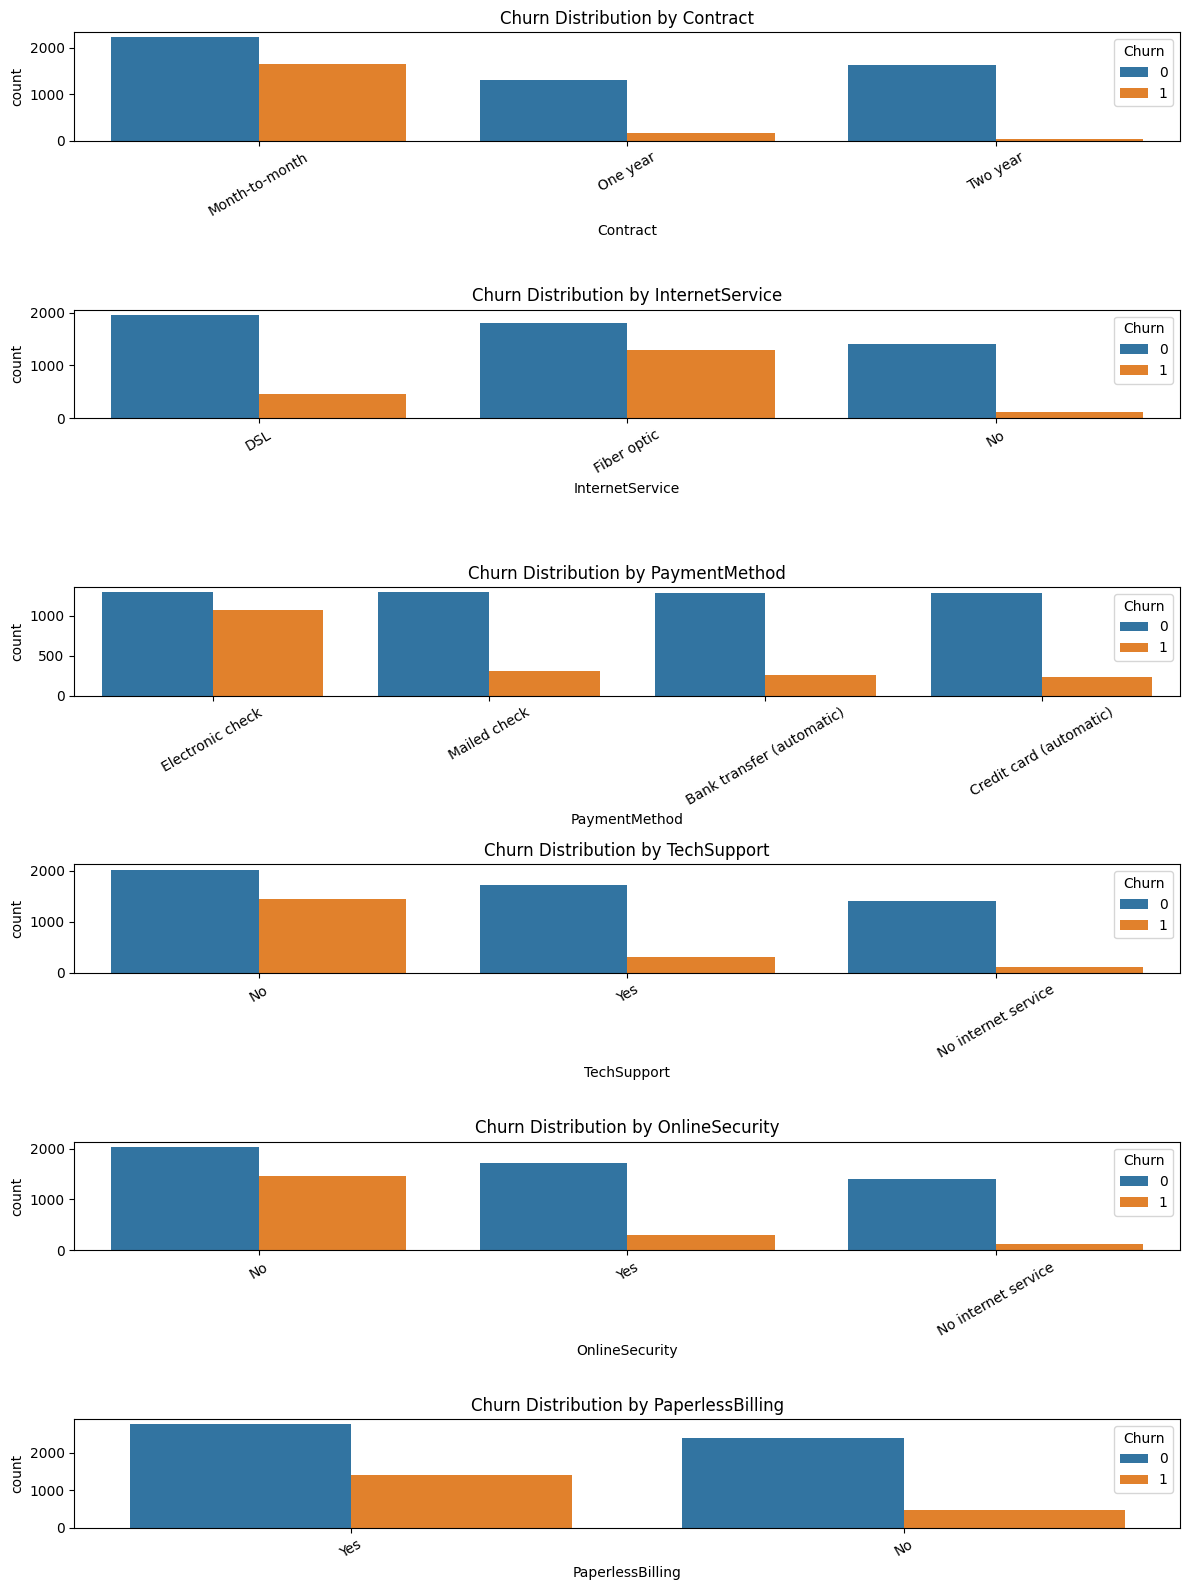

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 16))


useful_cat_features = [
    'Contract', 'InternetService', 'PaymentMethod',
    'TechSupport', 'OnlineSecurity', 'PaperlessBilling'
]


for i, col in enumerate(useful_cat_features, 1):
    plt.subplot(len(useful_cat_features), 1, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn Distribution by {col}')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


Visualize Numeric Features vs Churn

Box plots or violin plots to compare MonthlyCharges, TotalCharges, tenure by churn status.

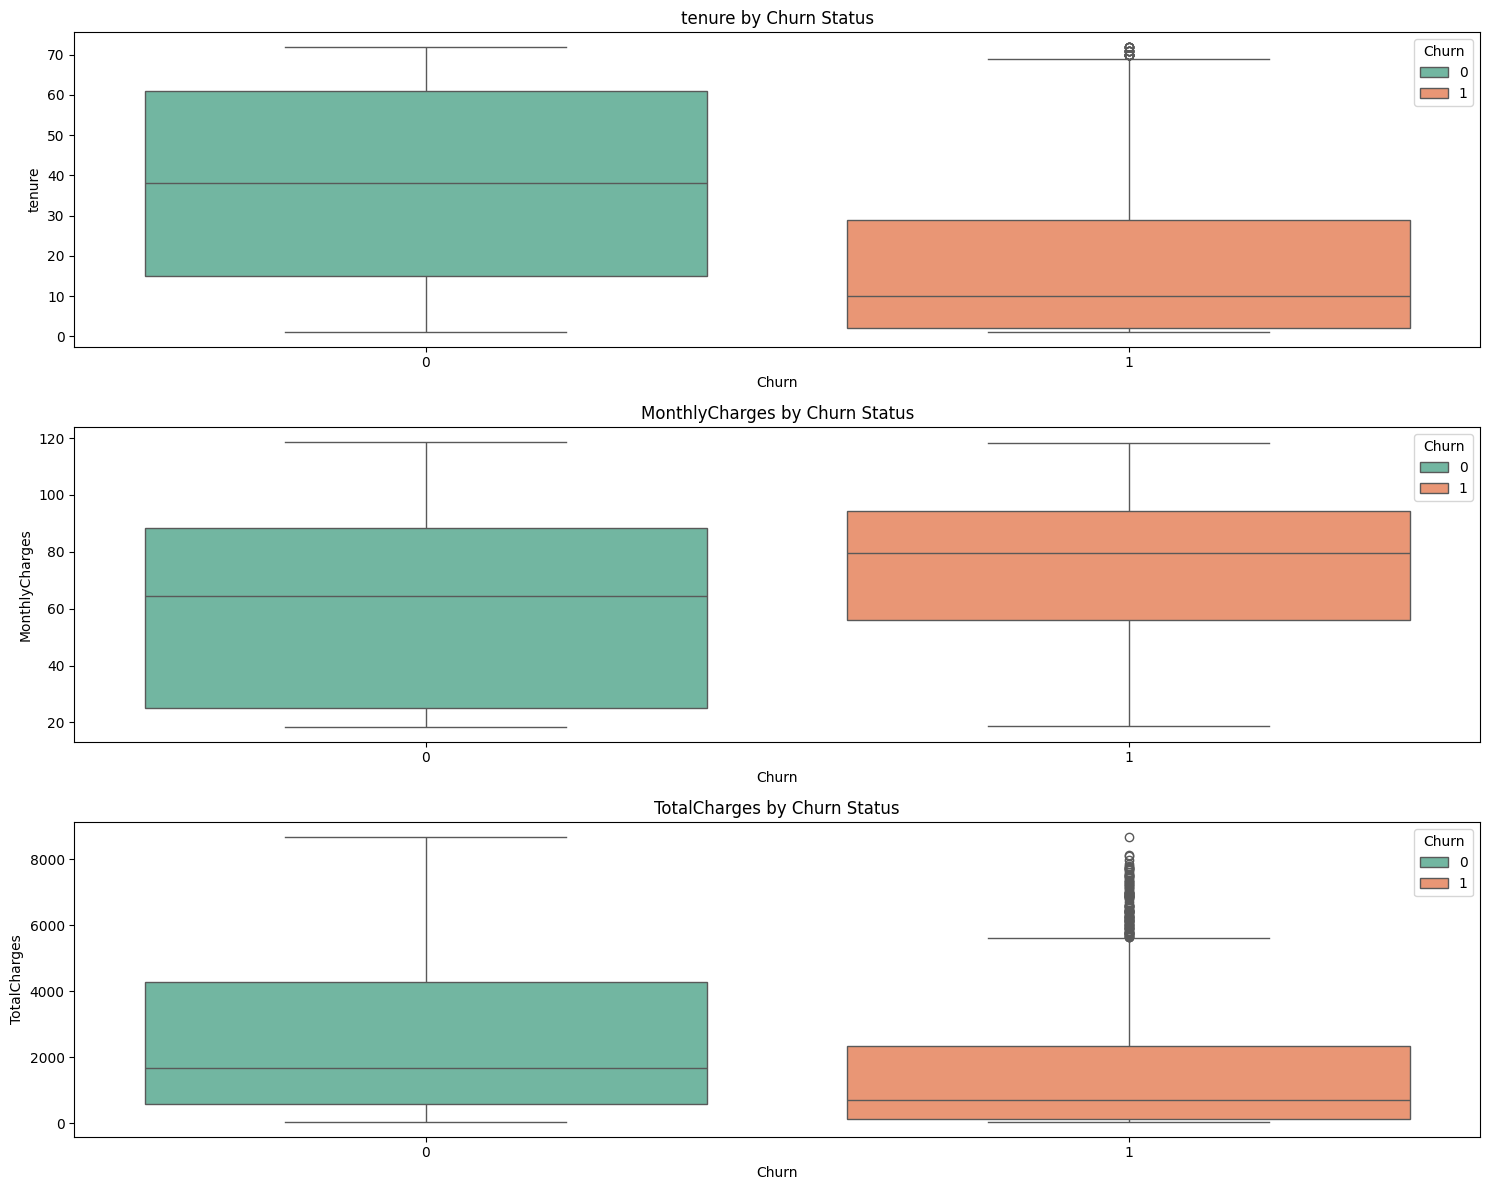

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 12))

for i, col in enumerate(num_features, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(data=df, x='Churn', y=col, palette='Set2', hue='Churn')
    plt.title(f'{col} by Churn Status')

plt.tight_layout()
plt.show()


Correlation Heatmap (for numeric features)

- Helps identify multicollinearity or strong numeric patterns.

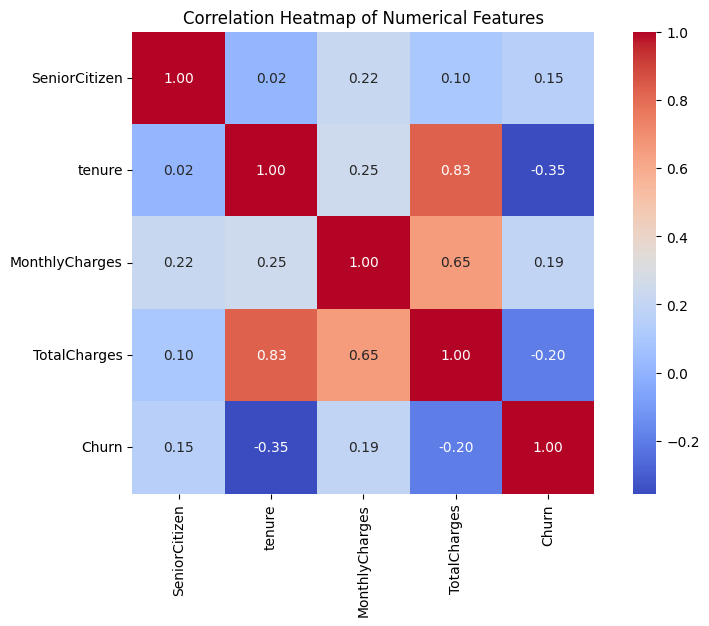

In [55]:
# Select only numeric features
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Data Preprocessing
- preparing our data for machine learning models

**Encoding categorical variables**

In [56]:
# Get only object-type (categorical) columns
cat_cols = df.select_dtypes(include='object').columns

# Separate binary and multi-class features
binary_features = [col for col in cat_cols if df[col].nunique() == 2]
multi_class_features = [col for col in cat_cols if df[col].nunique() > 2]

print("Binary:", binary_features)
print("Multi-class:", multi_class_features)


Binary: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Multi-class: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [57]:
# If you want a more format way
summary = pd.DataFrame({
    "Feature": cat_cols,
    "Unique Values": [df[col].nunique() for col in cat_cols],
    "Type": ["Binary" if df[col].nunique() == 2 else "Multi-class" for col in cat_cols]
})
summary.sort_values(by='Unique Values', ascending=False)


,Feature,Unique Values,Type
14,PaymentMethod,4,Multi-class
5,InternetService,3,Multi-class
6,OnlineSecurity,3,Multi-class
8,DeviceProtection,3,Multi-class
9,TechSupport,3,Multi-class
7,OnlineBackup,3,Multi-class
4,MultipleLines,3,Multi-class
10,StreamingTV,3,Multi-class
11,StreamingMovies,3,Multi-class
12,Contract,3,Multi-class


### Encoding categorical features
- LabelEncoding for binary class

In [58]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding for binary categorical columns
le = LabelEncoder()
for col in binary_features:
    df[col] = le.fit_transform(df[col])

In [59]:
# Check encoded binary features
df[binary_features]

,gender,Partner,Dependents,PhoneService,PaperlessBilling
customerID,,,,,
7590-VHVEG,0,1,0,0,1
5575-GNVDE,1,0,0,1,0
3668-QPYBK,1,0,0,1,1
7795-CFOCW,1,0,0,0,0
9237-HQITU,0,0,0,1,1
...,...,...,...,...,...
6840-RESVB,1,1,1,1,1
2234-XADUH,0,1,1,1,1
4801-JZAZL,0,1,1,0,1


- One-Hot Encoding for multi-class features

In [60]:
# One-Hot Encoding for multi-class categorical columns
df = pd.get_dummies(df, columns=multi_class_features, drop_first=True)


In [61]:
# Identify boolean columns
bool_cols = df.select_dtypes(include='bool').columns

# Convert only boolean columns to int
df[bool_cols] = df[bool_cols].astype(int)


In [62]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [64]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64


**Feature Scaling**

- Scaling numerical features, like tenure, MonthlyCharges, and TotalCharges, to ensure consistent value ranges.

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [67]:
df[numeric_cols].head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,-1.280248,-1.161694,-0.994194
5575-GNVDE,0.064303,-0.260878,-0.173740
3668-QPYBK,-1.239504,-0.363923,-0.959649
7795-CFOCW,0.512486,-0.747850,-0.195248
9237-HQITU,-1.239504,0.196178,-0.940457


**Separate features and Target Variable**

- X: the input features (independent variables)

- y: the target variable (what we want to predict)

In [68]:
# Target variable
y = df['Churn']

# Feature set (drop the target column)
X = df.drop('Churn', axis=1)

**Train-Test Split**

To evaluate how well our model generalizes, we divide the dataset into:

- Training set: Used to train the model.

- Testing set: Used to assess performance on unseen data.

In [69]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


 **Handle Class Imbalance in Training Data**

Since our dataset is imbalanced — with around 73% 'No' and 27% 'Yes' for Churn — it's important to balance the classes in the training set. This ensures the model does not become biased toward the majority class.

In [76]:
from imblearn.over_sampling import SMOTE

# Instantiate oversampler
ros = SMOTE(random_state=42)

# Apply only to training set
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [77]:
y_train_resampled.value_counts()

,count
Churn,
0,4130
1,4130


### Build a Model Pipeline

A pipeline allows you to:

- Organize preprocessing and model training into a single workflow

- Ensure consistent application of transformations

- Prevent data leakage

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    'Rfc': RandomForestClassifier(random_state=42)
}


**Train and Evaluate the models**

In [84]:
from sklearn.metrics import classification_report

# Shared scaler step before model
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_test)

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407


Model: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1033
           1       0.55      0.66      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407


Model: Rfc
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg      

**Recommendation:**
- Visualize the ROC-AUC
- Visualize the Confusion Matrix
- Hyperparameter tuning
  - using GridSearchCV or RandomizedSearchCV